In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [29]:
df = pd.read_csv("Dataset .csv")

In [31]:
features = ['Aggregate rating', 'Votes', 'Price range']
df_cluster = df[features].dropna()

In [33]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)
scaled_df = pd.DataFrame(scaled_features, columns=features)

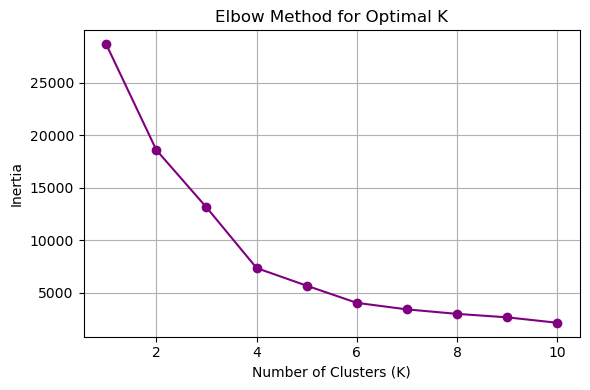

In [35]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o', color='purple')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.savefig("Level_3_Task2_ElbowPlot.png")  # Save Elbow Plot
plt.show()

In [36]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_df)

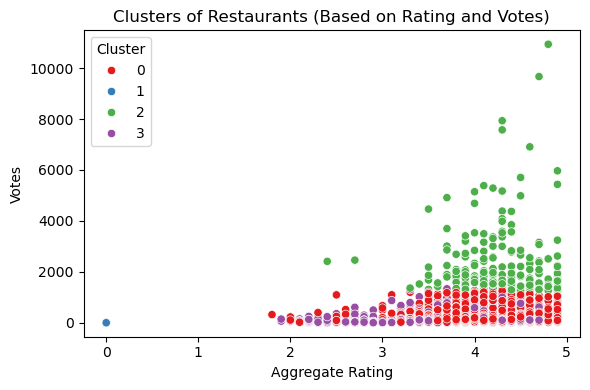

In [39]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_cluster, x='Aggregate rating', y='Votes', hue='Cluster', palette='Set1')
plt.title("Clusters of Restaurants (Based on Rating and Votes)")
plt.xlabel("Aggregate Rating")
plt.ylabel("Votes")
plt.tight_layout()
plt.savefig("Level_3_Task2_ClusterPlot.png")  # Save Cluster Plot
plt.show()